# Ongoing analysis of sentiment timelines.

This will expand as time goes on and as more matches go on.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parameters
plt.style.use('ggplot')
competitions_to_plot = ['League', 'CLq'] #This also defines their order

### sentiment index per match index

The sentiment match index ($I$) is:

$$
I = {N_\text{pos} - N_\text{neg} \over N_\text{pos} + N_\text{neg}}
$$

Where $N$ is "the number of".

This means that when there is a greater number of positive comments, this is positive. And negative when there were more negative comments.

# Pos Neg match index

In [3]:
def pos_neg_match_index(df):
    Npos = len(df[df['sentiment']>0])
    Nneg = len(df[df['sentiment']<0])
    I = ( Npos - Nneg ) / ( Npos + Nneg )
    return I

### Get overlal sentiment per game

In [4]:
# Load each match
opponent = []
match_number = []
competition = []
match_sentiment_index = []
# loop through directory of data
for match in os.listdir('./data'):
    # load data
    df = pd.read_csv('./data/' + match)
    # load
    I = pos_neg_match_index(df)
    match_sentiment_index.append(I)
    # Split the file name to get match info
    match_info = match.split('.')
    match_info = match_info[0].split('_')
    competition.append(match_info[0])
    match_number.append(int(match_info[1]))
    opponent.append(match_info[2])

# Create a multiindex dataframe with competition and match index as the indexes
multi_ind = pd.MultiIndex.from_arrays([competition,match_number], names=['competition', 'match_index'])
mi = pd.DataFrame(data={'opponent':opponent, 'sentiment_index': match_sentiment_index},index=multi_ind)

Plot figure

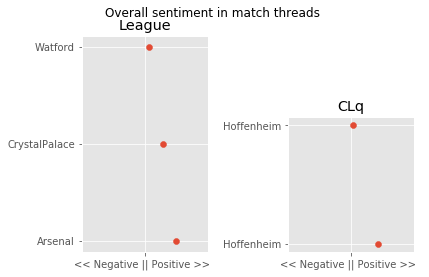

In [5]:
fig = plt.figure()
grid_rows = mi.groupby('competition').count().max()['sentiment_index']
grid_cols = len(competitions_to_plot)

# Loop through competitions and plot sentiment index for each match
ax = []
for i,c in enumerate(competitions_to_plot):
    n = len(mi['sentiment_index'][c])
    ax = plt.subplot2grid((grid_rows,grid_cols),(grid_rows-n,i),rowspan=n)
    ax.scatter(mi['sentiment_index'][c].sort_index(),np.arange(0,n))
    ax.invert_yaxis()
    ax.set_yticks(np.arange(0,n))
    ax.set_yticklabels(mi['opponent'][c].sort_index())
    ax.set_title(c)
    # This may need to change if comments get very negative or very positive
    ax.set_xlim([-.5,.5])
    ax.set_xticks([0])
    ax.set_xticklabels(['<< Negative || Positive >>  '])

fig.tight_layout()

# Add title to entire figure
suptitle = fig.suptitle('Overall sentiment in match threads')
fig.subplots_adjust(top=0.85)
suptitle.set_y(0.95)

# save figure - add the number of data points in the figure
fig.savefig('./figures/analysis-over-matches_n-' + str(len(mi)) + '.pdf',r=300)
fig.savefig('./figures/analysis-over-matches_n-' + str(len(mi)) + '.png',r=300)